In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/mcelroy_cosine_correlation.csv", sep="\t")

In [3]:
df

,text_1,text_2,y,cosine
0,Felt down or depressed for most of the day?,Felt nervous or anxious?,0.719539,0.611496
1,Felt down or depressed for most of the day?,Worried a lot about different things?,0.719244,0.445721
2,Felt down or depressed for most of the day?,Felt physically tense or agitated?,0.731183,0.711875
3,Felt down or depressed for most of the day?,"Felt your heart racing, difficulty breathing, ...",0.665979,0.571581
4,Felt down or depressed for most of the day?,Felt “on edge”?,0.703581,0.511956
...,...,...,...,...
736,Experienced reduced energy or fatigue?,Having powerful images or memories that someti...,0.530528,0.194023
737,Experienced reduced energy or fatigue?,Avoiding internal reminders of the experience ...,0.544454,0.284540
738,Experienced reduced energy or fatigue?,Avoiding external reminders of the experience ...,0.542928,0.190842
739,Experienced reduced energy or fatigue?,"Being “super-alert”, watchful, or on guard?",0.519665,0.355699


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
m = LinearRegression()

In [6]:
m.fit(df[["cosine"]], df.y)

LinearRegression()

In [7]:
m.coef_

array([0.27562271])

In [8]:
m.intercept_

0.5374678271626451

In [9]:
import matplotlib.pyplot as plt

In [14]:
xs = sorted(df.cosine)
ys= m.predict([[x] for x in xs])

/home/thomas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


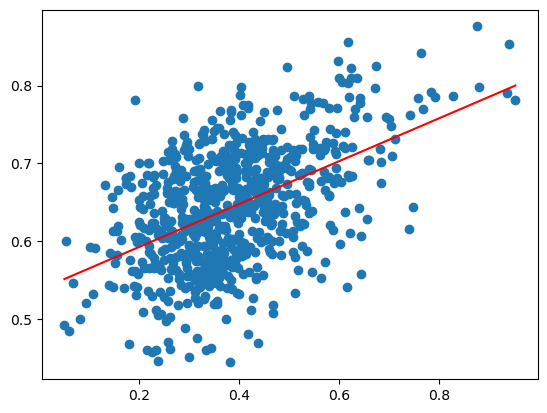

In [19]:
plt.scatter(df.cosine, df.y)
plt.plot(xs, ys, color="red")

In [20]:
m.predict([[0]])

/home/thomas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.53746783])

In [21]:
m.predict([[1]])

/home/thomas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.81309054])

In [24]:
df["residual"] = df.cosine - df.y

In [25]:
df.sort_values("residual", inplace=True)

In [30]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vectoriser = CountVectorizer(lowercase=True)
transformer = TfidfTransformer()

nb = MultinomialNB()
model = make_pipeline(vectoriser, transformer, nb)

y = ["harmony false positive"] * len(df)
for i in range(len(df)//2):
    y[i] = "harmony missed"
    
for i in range(len(df)//4, len(df)//4 * 3):
    y[i] = "neither"



In [31]:
df["over_or_under"] = y

In [34]:
df["concat"] = df.text_1 + " " + df.text_2

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
df_train, df_test = train_test_split(df)

In [37]:
model.fit(df_train["concat"], df_train.over_or_under)


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('tfidftransformer', TfidfTransformer()),
                ('multinomialnb', MultinomialNB())])

In [39]:
y_pred = model.predict(df_test["concat"])

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(df_test.over_or_under, y_pred)

0.521505376344086

In [42]:

fake_document = " ".join(vectoriser.vocabulary_)
vectorised_document = vectoriser.transform([fake_document])
transformed_document = transformer.transform(vectorised_document)
probas = np.zeros((transformed_document.shape[1]))

for prediction_idx in range(3):
    print(f"Strongest predictors for class {prediction_idx} {model.classes_[prediction_idx]}\n")
    for i in range(transformed_document.shape[1]):
        zeros = np.zeros(transformed_document.shape)
        zeros[0, i] = transformed_document[0, i]
        proba = nb.predict_log_proba(zeros)
        probas[i] = proba[0, prediction_idx]

    for ctr, j in enumerate(np.argsort(-probas)):
        for w, i in vectoriser.vocabulary_.items():
            if i == j:
                print(f"{ctr}\t{w}")
        if ctr > 15:
            break

Strongest predictors for class 0 harmony false positive

0	moving
1	staying
2	falling
3	asleep
4	sleeping
5	opposite
6	speaking
7	around
8	usual
9	than
10	noticed
11	slowly
12	other
13	fidgety
14	could
15	nervous
16	anxious
Strongest predictors for class 1 harmony missed

0	disturbances
1	fatigue
2	reduced
3	watching
4	newspaper
5	reading
6	television
7	such
8	guilt
9	worthlessness
10	sleep
11	overeating
12	poor
13	concentrating
14	objects
15	places
16	situations
Strongest predictors for class 2 neither

0	relaxing
1	if
2	afraid
3	might
4	happen
5	awful
6	something
7	related
8	dreams
9	part
10	upsetting
11	clearly
12	replay
13	not
14	control
15	able
16	stop


In [48]:
df["sleep"] = df["concat"].str.contains("sleep")

In [49]:
df["dream"] = df["concat"].str.contains("dream")

In [50]:
m.fit(df[["cosine", "sleep", "dream"]], df.y)

LinearRegression()

In [51]:
pred = m.predict(df[["cosine", "sleep", "dream"]])

In [52]:
import numpy
actual = df.y
predict = pred

corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
print (corr)
R_sq = corr**2

print(R_sq)

0.5498936116442322
0.3023829841271377


In [53]:
m.coef_

array([ 0.25260324, -0.03738961, -0.05534086])